<a href="https://colab.research.google.com/github/oisincam/Neural-Networks/blob/main/NN_California_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

## First some exploratory Analysis

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
data['median_house_value'] = data['median_house_value']/100000
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,3.447
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,1.765
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,2.705
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,3.300
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,0.817


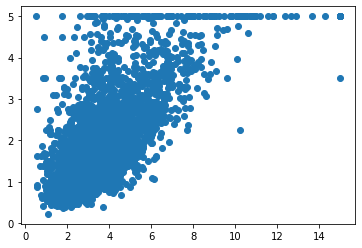

In [ ]:
plt.scatter(data['median_income'], data['median_house_value'])

In [ ]:
data['median_house_value'].describe()

count    3000.000000
mean        2.058463
std         1.131197
min         0.225000
25%         1.212000
50%         1.776500
75%         2.639750
max         5.000010
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63b8fa1910>,
      dtype=object)

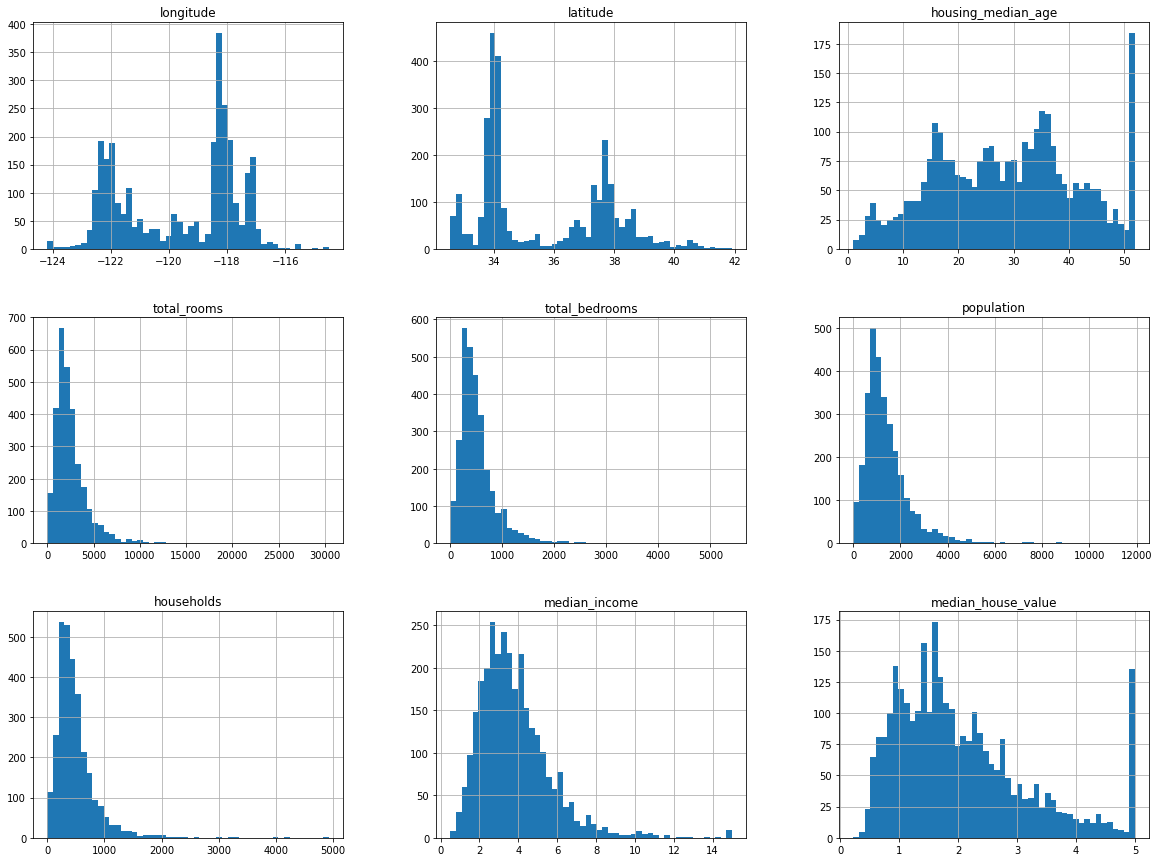

In [ ]:
data.hist(bins = 50,figsize = (20,15))

In [ ]:
# there are some outlier observations in the median house value, so I will cut out upper and lower quaurtile + 1.5IQR


In [ ]:
true_vals.describe()

count    3000.000000
mean        2.058463
std         1.131197
min         0.225000
25%         1.212000
50%         1.776500
75%         2.639750
max         5.000010
Name: median_house_value, dtype: float64

In [ ]:
perc25 = true_vals.quantile(0.25)
perc75 = true_vals.quantile(0.75)

In [ ]:
iqr = perc75-perc25
upper_limit = perc75+1.5*iqr
lower_limit = perc25-1.5*iqr
lower_limit

-0.9296249999999999

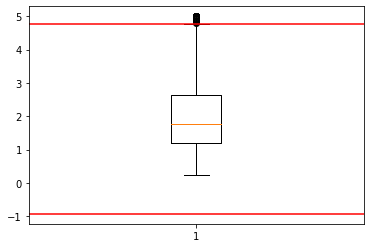

In [ ]:
plt.boxplot(true_vals )
plt.axhline(upper_limit,c = 'r')
plt.axhline(lower_limit , c = 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63b84d7c50>,
      dtype=object)

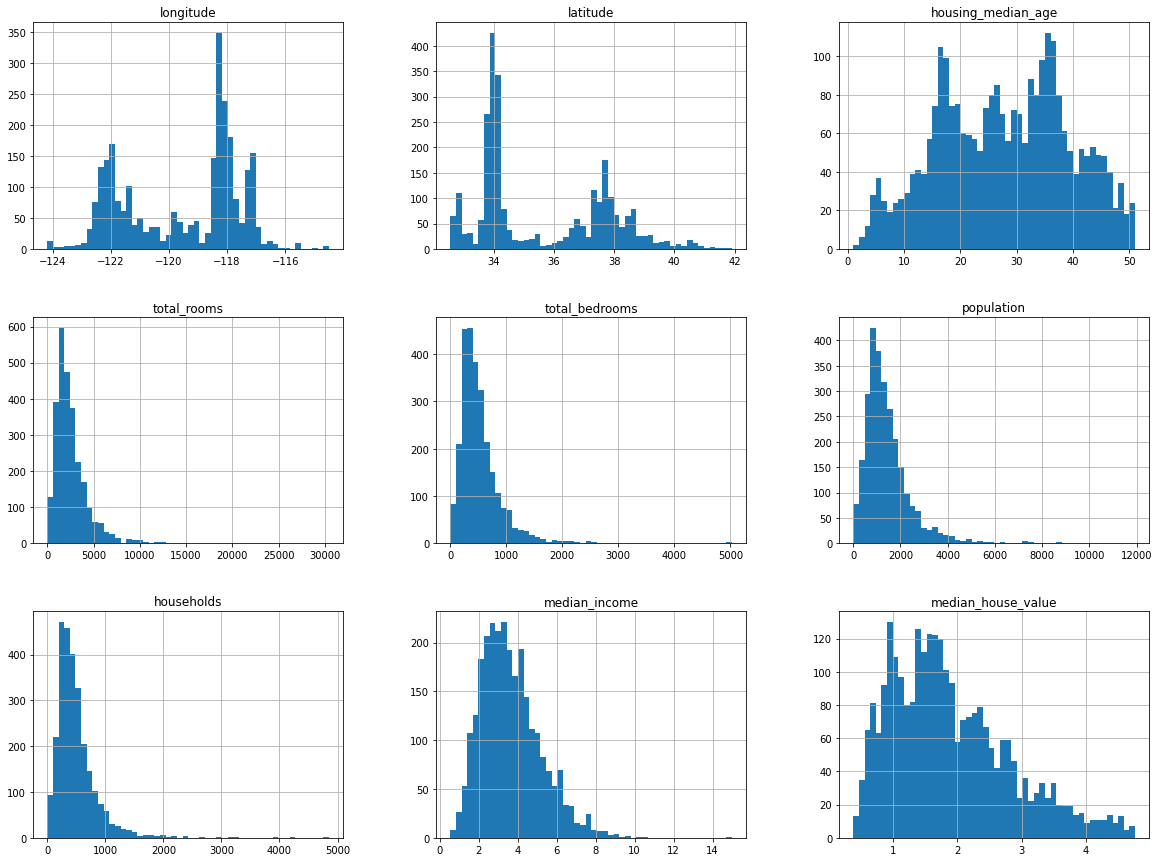

In [ ]:
data = data[data['median_house_value']<upper_limit]
data = data[data['housing_median_age']<52]
data.hist(figsize=(20,15), bins = 50)

Now we check how each each parameter correlates with the output

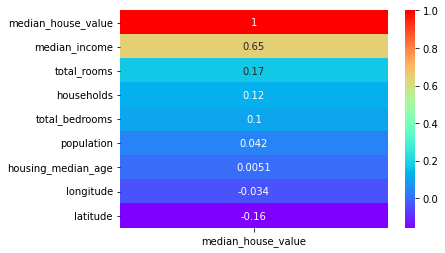

In [ ]:
x_data = data.drop(['median_house_value'], axis =1)
true_vals = data['median_house_value']
corrs = data.corr()[['median_house_value']].sort_values(by = ['median_house_value'], ascending = False)
sns.heatmap(corrs, cmap = 'rainbow', annot = True)

## Now we normalise our data

## Time to create the model

In [ ]:
x_data = data.drop(['median_house_value'], axis =1)
x_data = x_data.drop(['longitude'], axis =1)
x_data = x_data.drop(['housing_median_age'], axis =1)
x_data = x_data.drop(['population'], axis =1)
x_data.head()

,latitude,total_rooms,total_bedrooms,households,median_income
0,37.37,3885.0,661.0,606.0,6.6085
1,34.26,1510.0,310.0,277.0,3.5990
2,33.78,3589.0,507.0,495.0,5.7934
3,33.82,67.0,15.0,11.0,6.1359
4,36.33,1241.0,244.0,237.0,2.9375


In [ ]:
true_vals = np.array(true_vals)
# we want to label the houses as either high value or low value
labels = []
for i in true_vals:
  if i >np.median(true_vals):
    labels.append(1)
  else: 
    labels.append(0)
labels = np.array(labels)
x_data = np.array(x_data)
print(np.shape(labels))
print(np.shape(true_vals))
print(np.mean(labels))
print(np.shape(x_data[0]))


(2703,)
(2703,)
0.49981502034776176
(5,)


In [ ]:
model = Sequential([
                    Dense(units = 320, input_shape=(5,), activation = 'relu'),
                    Dense(units = 384, activation = 'relu'),
                    Dense(units = 352, activation = 'relu'),
                    Dense(units = 448, activation = 'relu'),
                    Dense(units = 160, activation = 'relu'),
                    Dense(units = 160, activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 2, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 320)               1920      
                                                                 
 dense_86 (Dense)            (None, 384)               123264    
                                                                 
 dense_87 (Dense)            (None, 352)               135520    
                                                                 
 dense_88 (Dense)            (None, 448)               158144    
                                                                 
 dense_89 (Dense)            (None, 160)               71840     
                                                                 
 dense_90 (Dense)            (None, 160)               25760     
                                                                 
 dense_91 (Dense)            (None, 32)              

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(x = x_data, y = labels, validation_split=0.1 , batch_size=128, epochs=600, verbose = 2)

Epoch 1/600
19/19 - 0s - loss: 0.3485 - accuracy: 0.8273 - val_loss: 1.0164 - val_accuracy: 0.7528 - 363ms/epoch - 19ms/step
Epoch 2/600
19/19 - 0s - loss: 0.3349 - accuracy: 0.8355 - val_loss: 0.9390 - val_accuracy: 0.7491 - 332ms/epoch - 17ms/step
Epoch 3/600
19/19 - 0s - loss: 0.3467 - accuracy: 0.8244 - val_loss: 1.1059 - val_accuracy: 0.7417 - 309ms/epoch - 16ms/step
Epoch 4/600
19/19 - 0s - loss: 0.3455 - accuracy: 0.8368 - val_loss: 1.0602 - val_accuracy: 0.7601 - 293ms/epoch - 15ms/step
Epoch 5/600
19/19 - 0s - loss: 0.3828 - accuracy: 0.8146 - val_loss: 0.9507 - val_accuracy: 0.7565 - 288ms/epoch - 15ms/step
Epoch 6/600
19/19 - 0s - loss: 0.3418 - accuracy: 0.8388 - val_loss: 0.9424 - val_accuracy: 0.7491 - 296ms/epoch - 16ms/step
Epoch 7/600
19/19 - 0s - loss: 0.3751 - accuracy: 0.8084 - val_loss: 0.9236 - val_accuracy: 0.7675 - 327ms/epoch - 17ms/step
Epoch 8/600
19/19 - 0s - loss: 0.4231 - accuracy: 0.7812 - val_loss: 0.9687 - val_accuracy: 0.7159 - 332ms/epoch - 17ms/step
